<a href="https://colab.research.google.com/github/Insight-Syndicate/Octave-DSPL/blob/main/Octave_DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test CSV**

## **Data Exploration**

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
test = pd.read_csv("/content/test.csv")
test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48
40745,4185,Wattala,3191.92,3004.16,3098.04
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees
40747,11874,Wattala,4313.76,4183.04,4313.76


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [47]:
test.describe()

,Customer_ID
count,40749.000000
mean,20375.000000
std,11763.367396
min,1.000000
25%,10188.000000
50%,20375.000000
75%,30562.000000
max,40749.000000


In [48]:
unique_values_test = test.apply(pd.Series.unique)
print(unique_values_test)

Customer_ID     [33574, 10089, 38329, 11376, 12410, 826, 10364...
outlet_city     [batticaloa, Batticaloa, Colombo, Dehiwala-Mou...
luxury_sales    [2686.5, 1717.56, 854.04, 1638.12, 1039.09, 12...
fresh_sales     [3582, 2576.34, 1242.24, 2320.67, 1518.67, 149...
dry_sales       [12537, 9446.58, 5201.88, 9282.68, 5435.24, 68...
dtype: object


In [49]:
missing_values = test.isnull().sum()
print(missing_values)

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [50]:
num_duplicates1 = test.duplicated().sum()
num_duplicates1

0

## **EDA**

### **UNIVARIATE**

In [51]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

test_before = test.copy()

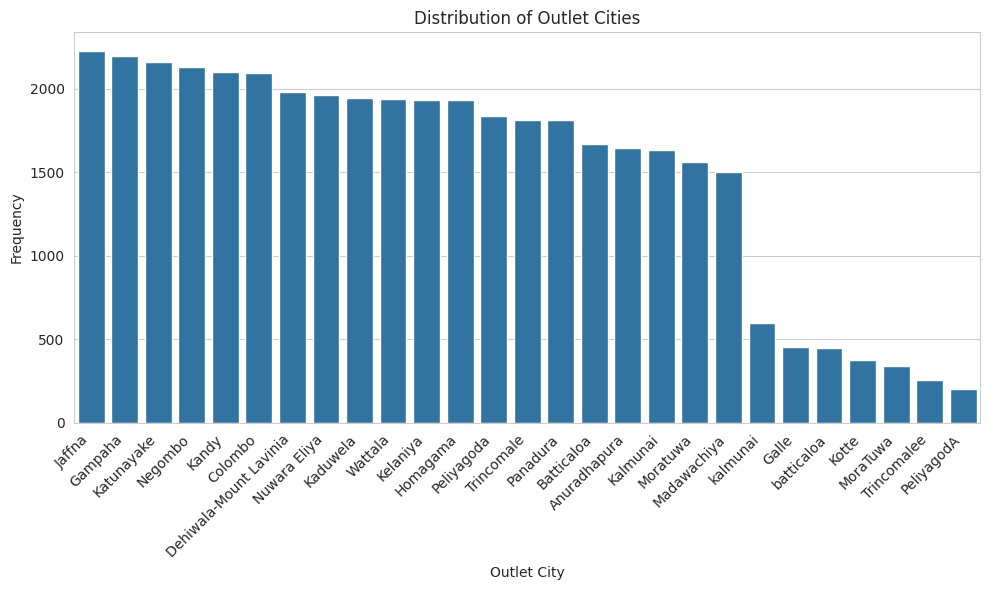

In [54]:
# Bar Plot - distribution of outlet cities
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=test_before, order=test_before['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

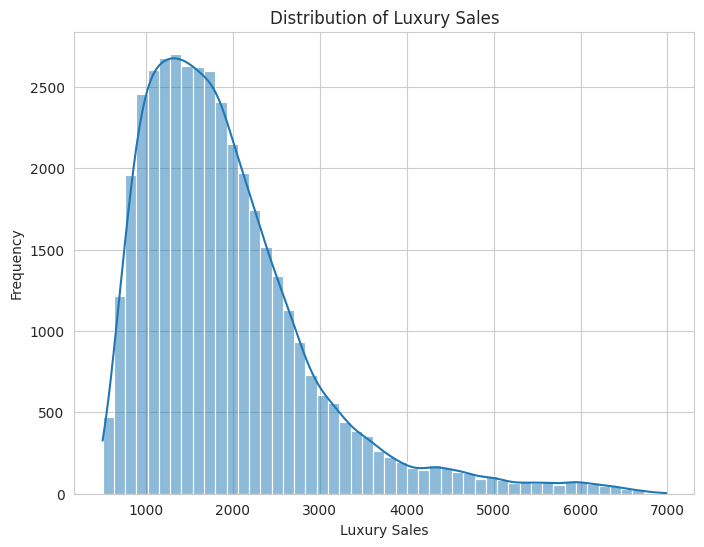

In [55]:
# distribution of luxury sales
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype(float)


plt.figure(figsize=(8, 6))
sns.histplot(test["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

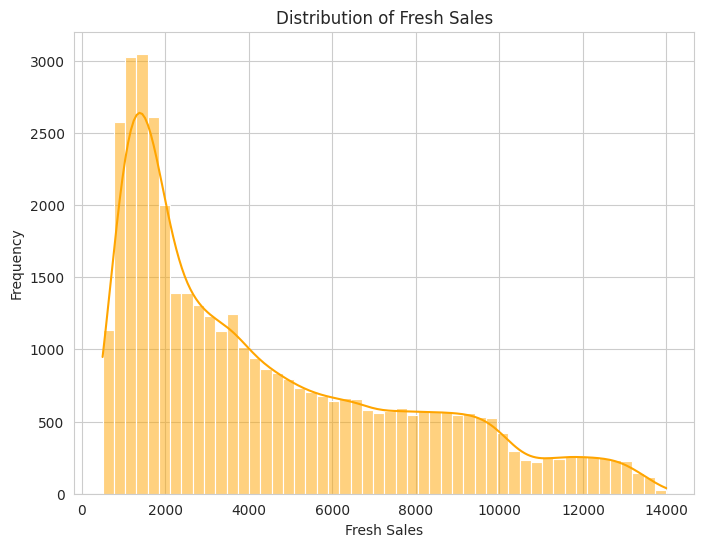

In [56]:
# distribution of fresh sales
test['fresh_sales'] = pd.to_numeric(test['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

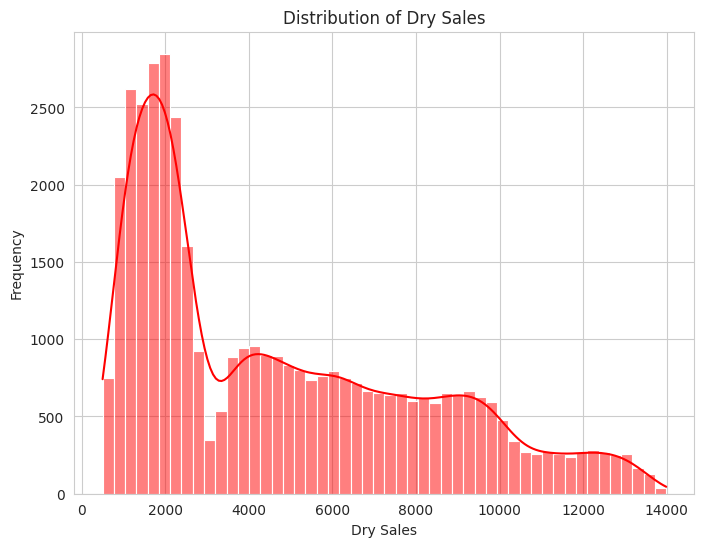

In [57]:
# distribution of dry sales
test['dry_sales'] = pd.to_numeric(test['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

### **MULTIVARIATE**

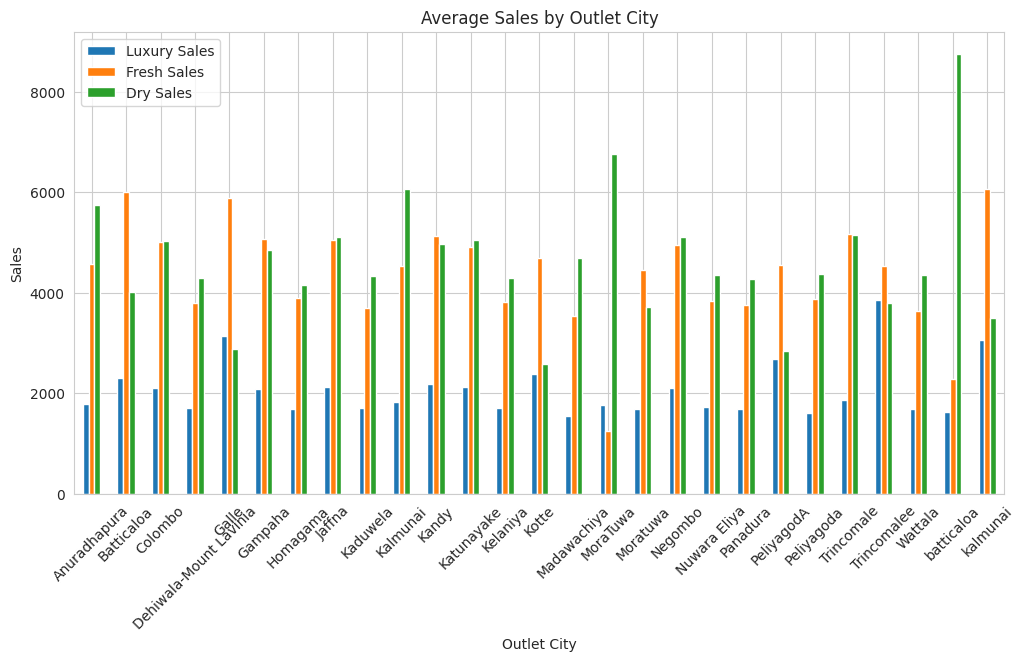

In [58]:
# Avg sales by outlet city
test_grouped = test.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
test_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

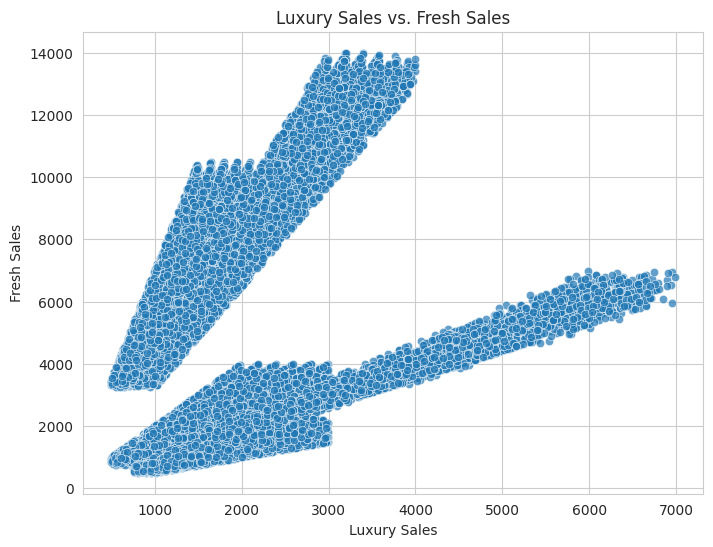

In [59]:
# scatter plot of luxury sales Vs Fresh sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="luxury_sales", y="fresh_sales", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.show()

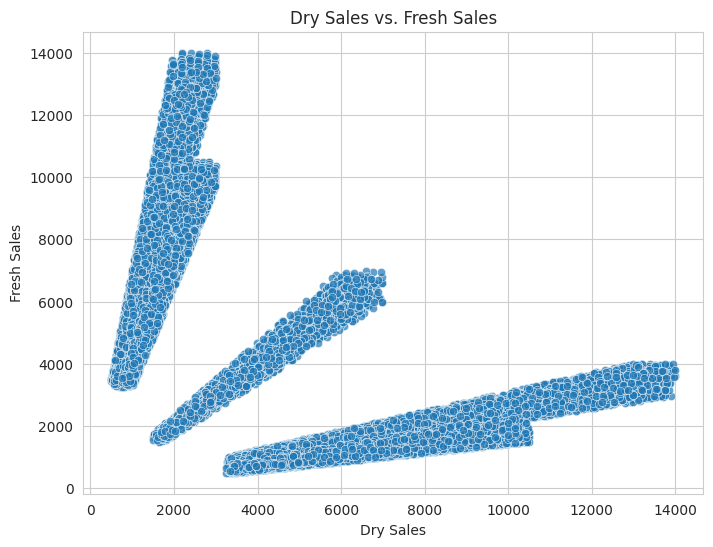

In [60]:
# Scatter plot of dry sales Vs Fresh sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="dry_sales", y="fresh_sales", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.show()

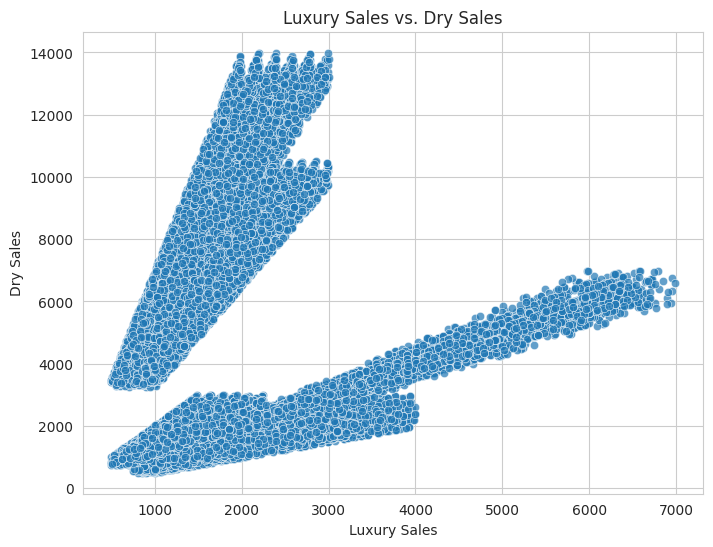

In [61]:
# scatter plot of luxury sales vs dry sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="luxury_sales", y="dry_sales", alpha=0.7)
plt.title("Luxury Sales vs. Dry Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.show()

<Figure size 1200x600 with 0 Axes>

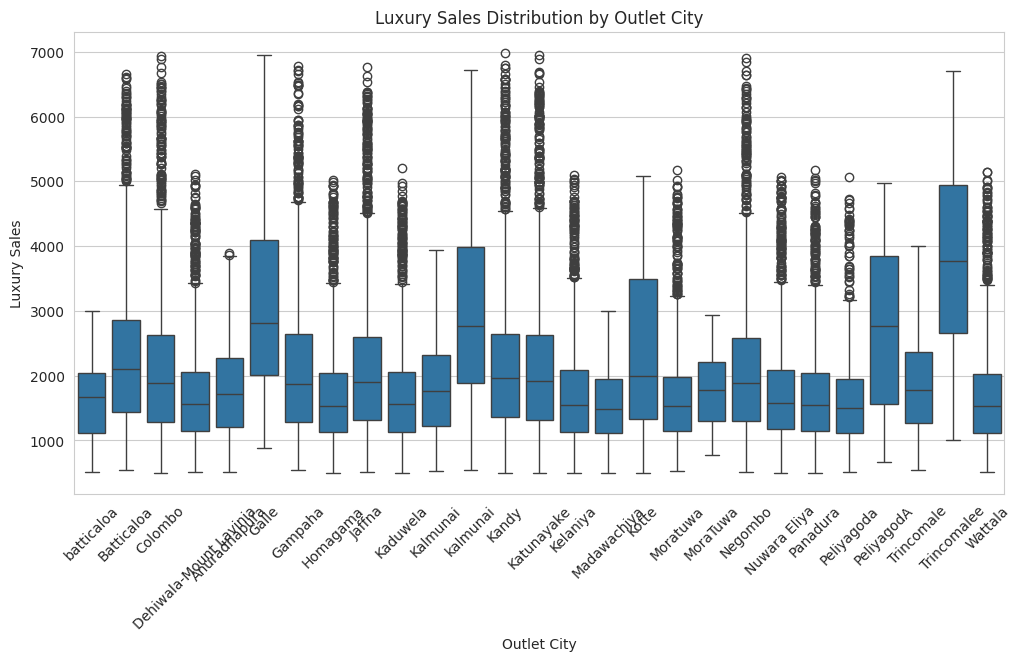

In [62]:
# luxury sales distribution by outlet city
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="luxury_sales", data=test)
plt.xlabel("Outlet City")
plt.ylabel("Luxury Sales")
plt.xticks(rotation=45)
plt.title("Luxury Sales Distribution by Outlet City")
plt.show()

In [ ]:
# fresh sales distribution by outlet city
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="fresh_sales", data=test_before)
plt.xlabel("Outlet City")
plt.ylabel("Fresh Sales")
plt.xticks(rotation=45)
plt.title("Fresh Sales Distribution by Outlet City")
plt.show()

In [ ]:
# dry sales distribution by outlet city
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="dry_sales", data=test_before)
plt.xlabel("Outlet City")
plt.ylabel("Dry Sales")
plt.xticks(rotation=45)
plt.title("Dry Sales Distribution by Outlet City")
plt.show()

In [ ]:
# correlation matrix
correlation_matrix = test.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **EDA Before Cleaning**

### **UNIVARIATE**

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

test_before = test.copy()

In [ ]:
# Bar Plot - distribution of outlet cities

test_before['luxury_sales'] = pd.to_numeric(test_before['luxury_sales'], errors='coerce').astype(float)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(test_before['luxury_sales'], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Bar Plot - distribution of outlet cities

plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=test_before, order=test_before['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# distribution of luxury sales
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype(float)


plt.figure(figsize=(8, 6))
sns.histplot(test["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of fresh sales
test_before['fresh_sales'] = pd.to_numeric(test_before['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test_before['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of dry sales
test_before['dry_sales'] = pd.to_numeric(test_before['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test_before['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

### **MULTIVARIATE**

In [ ]:
# Avg sales by outlet city
test_grouped = test_before.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
test_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

In [ ]:
# scatter plot of luxury sales Vs Fresh sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_before, x="luxury_sales", y="fresh_sales", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# Scatter plot of dry sales Vs Fresh sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_before, x="dry_sales", y="fresh_sales", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# scatter plot of luxury sales vs dry sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_before, x="luxury_sales", y="dry_sales", alpha=0.7)
plt.title("Luxury Sales vs. Dry Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.show()

In [ ]:
# luxury sales distribution by outlet city
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="luxury_sales", data=test_before)
plt.xlabel("Outlet City")
plt.ylabel("Luxury Sales")
plt.xticks(rotation=90)
plt.title("Luxury Sales Distribution by Outlet City")
plt.show()

In [ ]:
# fresh sales distribution by outlet city
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="fresh_sales", data=test_before)
plt.xlabel("Outlet City")
plt.ylabel("Fresh Sales")
plt.xticks(rotation=90)
plt.title("Fresh Sales Distribution by Outlet City")
plt.show()

In [ ]:
# dry sales distribution by outlet city
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="dry_sales", data=test_before)
plt.xlabel("Outlet City")
plt.ylabel("Dry Sales")
plt.xticks(rotation=90)
plt.title("Dry Sales Distribution by Outlet City")
plt.show()

In [ ]:
# correlation matrix
correlation_matrix = test_before.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

In [ ]:
# read the data again
test = pd.read_csv('/content/test.csv', dtype={'fresh_sales': str, 'luxury_sales': str, 'dry_sales': str})
test

In [ ]:
# Check the shape of the data
test.shape

In [ ]:
# Checking the datatypes
test.dtypes

In [ ]:
# Check for number of missing values in each coulmn
test.isnull().sum()

In [ ]:
# change the object data types to float for sales features
test['fresh_sales'] = pd.to_numeric(test['fresh_sales'].str.replace(',', '',regex=True), errors='coerce')
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'].str.replace(',', '',regex=True), errors='coerce')
test['dry_sales'] = pd.to_numeric(test['dry_sales'].str.replace(',', '',regex=True), errors='coerce')

In [ ]:
# Check for number of missing values in each coulmn
test.isnull().sum()

In [ ]:
# Total number of rows with missing values
test.isnull().any(axis=1).sum()

In [ ]:
# display the rows with null values
test[test.isnull().any(axis=1)]

In [ ]:
# show the raw data rows with these customer Ids
test_check = pd.read_csv('/content/test.csv')
test_check[test_check['Customer_ID'].isin([10364, 4059, 28662, 28664])]

In [ ]:
# replace the values in words with the correct values
test.loc[test['Customer_ID'] == 10364, 'luxury_sales'] = 760
test.loc[test['Customer_ID'] == 4059, 'luxury_sales'] = 815
test.loc[test['Customer_ID'] == 28662, 'fresh_sales'] = 9000
test.loc[test['Customer_ID'] == 28664, 'dry_sales'] = 3700

In [ ]:
# Total number of rows with missing values
test.isnull().any(axis=1).sum()

In [ ]:
# change the customer ID feature to string datatype
test['Customer_ID'] = test['Customer_ID'].astype(str)
# Check data types
test.dtypes

In [ ]:
# check the unique values in the outlet city fearture
test.outlet_city.unique()

In [ ]:
test.outlet_city.nunique()

In [ ]:
# Correcting the misspellings
test.loc[test['outlet_city'] == 'batticaloa', 'outlet_city'] = 'Batticaloa'
test.loc[test['outlet_city'] == 'kalmunai', 'outlet_city'] = 'Kalmunai'
test.loc[test['outlet_city'] == 'MoraTuwa', 'outlet_city'] = 'Moratuwa'
test.loc[test['outlet_city'] == 'PeliyagodA', 'outlet_city'] = 'Peliyagoda'
test.loc[test['outlet_city'] == 'Trincomale', 'outlet_city'] = 'Trincomalee'

In [ ]:
# check the unique values in the outlet city fearture
test.outlet_city.unique()

In [ ]:
dft=test[(test['outlet_city']=='Anuradhapura') | (test['outlet_city']=='Madawachiya')]
dft

In [ ]:
dft.shape

In [ ]:
# box plot for the dry sales
sns.boxplot(x=test['dry_sales'])

In [ ]:
# box plot for the fresh sales
sns.boxplot(x=test['fresh_sales'])

In [ ]:
# box plot for the luxury sales
sns.boxplot(x=test['luxury_sales'])

## EDA After Cleaning

### Univariate

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(test_before['luxury_sales'], bins=50, kde=True)
plt.title("Luxury Sales (Before Cleaning)")
plt.subplot(1, 2, 2)
sns.histplot(test['luxury_sales'], bins=50, kde=True)
plt.title("Luxury Sales (After Cleaning)")
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='outlet_city', data=test_before, order=test_before['outlet_city'].value_counts().index)
plt.title('Outlet Cities (Before Cleaning)')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.countplot(x='outlet_city', data=test, order=test['outlet_city'].value_counts().index)
plt.title('Outlet Cities (After Cleaning)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(test_before['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Fresh Sales (Before Cleaning)")
plt.subplot(1, 2, 2)
sns.histplot(test['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Fresh Sales (After Cleaning)")
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(test_before['dry_sales'], bins=50, kde=True, color='red')
plt.title("Dry Sales (Before Cleaning)")
plt.subplot(1, 2, 2)
sns.histplot(test['dry_sales'], bins=50, kde=True, color='red')
plt.title("Dry Sales (After Cleaning)")
plt.show()

### Multivariate

In [ ]:
test_before_grouped = test_before.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
test_grouped = test.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

test_before_grouped.plot(x="outlet_city", kind="bar", ax=axes[0])
axes[0].set_title("Average Sales Before Data Cleaning")
axes[0].set_xlabel("Outlet City")
axes[0].set_ylabel("Average Sales")
axes[0].tick_params(axis='x', rotation=90)
axes[0].legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])

test_grouped.plot(x="outlet_city", kind="bar", ax=axes[1])
axes[1].set_title("Average Sales After Data Cleaning")
axes[1].set_xlabel("Outlet City")
axes[1].set_ylabel("Average Sales")
axes[1].tick_params(axis='x', rotation=90)
axes[1].legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=test_before, x="luxury_sales", y="fresh_sales", alpha=0.7, ax=axes[0])
axes[0].set_title("Luxury Sales vs. Fresh Sales (Before)")
axes[0].set_xlabel("Luxury Sales")
axes[0].set_ylabel("Fresh Sales")

sns.scatterplot(data=test, x="luxury_sales", y="fresh_sales", alpha=0.7, ax=axes[1])
axes[1].set_title("Luxury Sales vs. Fresh Sales (After)")
axes[1].set_xlabel("Luxury Sales")
axes[1].set_ylabel("Fresh Sales")

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=test_before, x="dry_sales", y="fresh_sales", alpha=0.7, ax=axes[0])
axes[0].set_title("Dry Sales vs. Fresh Sales (Before)")
axes[0].set_xlabel("Dry Sales")
axes[0].set_ylabel("Fresh Sales")

sns.scatterplot(data=test, x="dry_sales", y="fresh_sales", alpha=0.7, ax=axes[1])
axes[1].set_title("Dry Sales vs. Fresh Sales (After)")
axes[1].set_xlabel("Dry Sales")
axes[1].set_ylabel("Fresh Sales")

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=test_before, x="luxury_sales", y="dry_sales", alpha=0.7, ax=axes[0])
axes[0].set_title("Luxury Sales vs. Dry Sales (Before)")
axes[0].set_xlabel("Luxury Sales")
axes[0].set_ylabel("Dry Sales")

sns.scatterplot(data=test, x="luxury_sales", y="dry_sales", alpha=0.7, ax=axes[1])
axes[1].set_title("Luxury Sales vs. Dry Sales (After)")
axes[1].set_xlabel("Luxury Sales")
axes[1].set_ylabel("Dry Sales")

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="outlet_city", y="luxury_sales", data=test_before, ax=axes[0])
axes[0].set_title("Luxury Sales Distribution by Outlet City (Before)")
axes[0].set_xlabel("Outlet City")
axes[0].set_ylabel("Luxury Sales")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x="outlet_city", y="luxury_sales", data=test, ax=axes[1])
axes[1].set_title("Luxury Sales Distribution by Outlet City (After)")
axes[1].set_xlabel("Outlet City")
axes[1].set_ylabel("Luxury Sales")
axes[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="outlet_city", y="fresh_sales", data=test_before, ax=axes[0])
axes[0].set_title("Fresh Sales Distribution by Outlet City (Before)")
axes[0].set_xlabel("Outlet City")
axes[0].set_ylabel("Fresh Sales")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x="outlet_city", y="fresh_sales", data=test, ax=axes[1])
axes[1].set_title("Fresh Sales Distribution by Outlet City (After)")
axes[1].set_xlabel("Outlet City")
axes[1].set_ylabel("Fresh Sales")
axes[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="outlet_city", y="dry_sales", data=test_before, ax=axes[0])
axes[0].set_title("Dry Sales Distribution by Outlet City (Before)")
axes[0].set_xlabel("Outlet City")
axes[0].set_ylabel("Dry Sales")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(x="outlet_city", y="dry_sales", data=test, ax=axes[1])
axes[1].set_title("Dry Sales Distribution by Outlet City (After)")
axes[1].set_xlabel("Outlet City")
axes[1].set_ylabel("Dry Sales")
axes[1].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
correlation_matrix_before = test_before.select_dtypes(include=np.number).corr()
correlation_matrix_after = test.select_dtypes(include=np.number).corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Correlation Matrix (Before)')

sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Correlation Matrix (After)')

plt.show()

# **Train CSV**

## **Data Exploration**

In [ ]:
train = pd.read_csv("/content/traincsv.csv")
train

In [ ]:
train.info()

In [ ]:
train.describe()

In [ ]:
train.shape

In [ ]:
unique_values_train = train.apply(pd.Series.unique)
print(unique_values_train)

In [ ]:
missing_values_train = train.isnull().sum()
print(missing_values_train)

In [ ]:
num_duplicates_train = train.duplicated().sum()
num_duplicates_train

In [ ]:
train.shape

## **EDA**

### **UNIVARIATE**

In [ ]:
# Bar Plot - distribution of outlet cities
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=train, order=train['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# distribution of luxury sales
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)


plt.figure(figsize=(8, 6))
sns.histplot(train["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of fresh sales
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of dry sales
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Bar Plot for "cluster" column
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_catgeory', data=train, order=train['cluster_catgeory'].value_counts().index, color='lightgreen')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# frequency distribution of cluster categories
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_catgeory', data=train)
plt.title("Frequency Distribution of Cluster Categories")
plt.xlabel("Cluster Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Multivariate**


In [ ]:
# Average sales by outlet city
train_grouped = train.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
train_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

In [ ]:
# Create the scatter plot for Luxury sales Vs Fresh Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="luxury_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot for dry sales Vs Fresh Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="dry_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot for luxury sales Vs Dry Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Fresh sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="fresh_sales")
plt.title("Fresh Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# Dry sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="dry_sales")
plt.title("Dry Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Dry Sales")
plt.show()

In [ ]:
# Luxury sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="luxury_sales")
plt.title("Luxury Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Luxury Sales")
plt.show()

In [ ]:
# Correlation Matrix
correlation_matrix = train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## **EDA Before Cleaning**

### **UNIVARIATE**

In [ ]:
train_before = train.copy()

In [ ]:
# Bar Plot - distribution of outlet cities
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=train_before, order=train_before['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# distribution of luxury sales
train_before['luxury_sales'] = pd.to_numeric(train_before['luxury_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train_before["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of fresh sales
train_before['fresh_sales'] = pd.to_numeric(train_before['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train_before['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# distribution of dry sales
train_before['dry_sales'] = pd.to_numeric(train_before['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train_before['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Bar Plot for "cluster" column
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_catgeory', data=train_before, order=train_before['cluster_catgeory'].value_counts().index, color='lightgreen')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# frequency distribution of cluster categories
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_catgeory', data=train_before)
plt.title("Frequency Distribution of Cluster Categories")
plt.xlabel("Cluster Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### **Multivariate**


In [ ]:
# Average sales by outlet city
train_grouped = train_before.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
train_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

In [ ]:
# Create the scatter plot for Luxury sales Vs Fresh Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_before, x="luxury_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot for dry sales Vs Fresh Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_before, x="dry_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot for luxury sales Vs Dry Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_before, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Fresh sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_before, x="cluster_catgeory", y="fresh_sales")
plt.title("Fresh Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# Dry sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_before, x="cluster_catgeory", y="dry_sales")
plt.title("Dry Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Dry Sales")
plt.show()

In [ ]:
# Luxury sales distribution by cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_before, x="cluster_catgeory", y="luxury_sales")
plt.title("Luxury Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Luxury Sales")
plt.show()

In [ ]:
# Correlation Matrix
correlation_matrix = train_before.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

In [ ]:
# Load the dataset
train = pd.read_csv('/content/traincsv.csv', dtype={'fresh_sales': str, 'luxury_sales': str, 'dry_sales': str, 'cluster_catgeory': str})
train

In [ ]:
# shape of the dataframe
train.shape

In [ ]:
# Check data types
train.dtypes

In [ ]:
# Check for number of missing values in each coulmn
train.isnull().sum()

In [ ]:
# change the object data types to float for sales features
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'].str.replace(',', '',regex=True), errors='coerce')
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'].str.replace(',', '',regex=True), errors='coerce')
train['dry_sales'] = pd.to_numeric(train['dry_sales'].str.replace(',', '',regex=True), errors='coerce')

In [ ]:
# Check for number of missing values in each coulmn
train.isnull().sum()

In [ ]:
# Total number of rows with missing values
train.isnull().any(axis=1).sum()

In [ ]:
# display the rows with null values
train[train.isnull().any(axis=1)]

In [ ]:
# display the tuples with cluster category null
train[train['cluster_catgeory'].isnull()]

In [ ]:
# display the tuples with luxury sales null
train[train['luxury_sales'].isnull()]

In [ ]:
# display the tuples with fresh sales null
train[train['fresh_sales'].isnull()]

In [ ]:
# display the tuples with dry sales null
train[train['dry_sales'].isnull()]

In [ ]:
# Calculating the percentage of the missing values
print(train.isnull().sum()/len(train)*100)
print(train.isnull().any(axis=1).sum()/len(train)*100)

In [ ]:
# since very low percentage & MACR - drop the null rows
train.dropna(inplace=True)
train.isnull().sum()

In [ ]:
# change the customer ID feature to string datatype
train['Customer_ID'] = train['Customer_ID'].astype(str)
# Check data types
train.dtypes

In [ ]:
# check for duplicates in customer ID
train[train['Customer_ID'].duplicated()]

In [ ]:
# Check the unique values in outlet city feature
train['outlet_city'].unique()

In [ ]:
train['outlet_city'].nunique()

In [ ]:
# Check the unique values from the cluster category feature
train['cluster_catgeory'].unique()

In [ ]:
# Correct the wrong values
train['cluster_catgeory'] = train['cluster_catgeory'].str.replace('6\\', '6')

In [ ]:
# Check the unique values from the cluster category feature
train['cluster_catgeory'].unique()

In [ ]:
# Rows with cluster category 100
train[train['cluster_catgeory'] == "100"]

In [ ]:
# drop the rows with invalid cluster categories
train = train.drop(train[(train['cluster_catgeory'] == "99") |
                         (train['cluster_catgeory'] == "100" ) |
                          (train['cluster_catgeory'] == "95") |
                           (train['cluster_catgeory'] == "98") |
                            (train['cluster_catgeory'] == "89")].index)

In [ ]:
# Rows with cluster category 100
train[train['cluster_catgeory'] == "100"]

In [ ]:
# box plot for the luxury sales
sns.boxplot(x=train['luxury_sales'])

In [ ]:
# box plot for the fresh sales
sns.boxplot(x=train['fresh_sales'])

In [ ]:
# box plot for the dry sales
sns.boxplot(x=train['dry_sales'])

In [ ]:
train['luxury_sales'].max()

## EDA After Cleaning

### Univariate

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
sns.countplot(x='outlet_city', data=train_before, order=train_before['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities (Before)')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')


plt.subplot(2, 1, 2)
sns.countplot(x='outlet_city', data=train, order=train['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities (After)')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.show()


In [ ]:
train_before['luxury_sales'] = pd.to_numeric(train_before['luxury_sales'], errors='coerce').astype(float)
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.histplot(train_before["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales (Before)")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
sns.histplot(train["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales(After)")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")

plt.show()

In [ ]:
train_before['fresh_sales'] = pd.to_numeric(train_before['fresh_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.histplot(train_before['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales (Before)")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
sns.histplot(train['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales (After)")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")

plt.show()

In [ ]:
train_before['dry_sales'] = pd.to_numeric(train_before['dry_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.histplot(train_before['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales (Before)")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")


plt.subplot(2, 1, 2)
sns.histplot(train_before['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales (After)")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")

plt.show()

In [ ]:
plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
sns.countplot(x='cluster_catgeory', data=train_before, order=train_before['cluster_catgeory'].value_counts().index, color='lightgreen')
plt.title('Distribution of Clusters (Before)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')


plt.subplot(2, 1, 2)
sns.countplot(x='cluster_catgeory', data=train_before, order=train['cluster_catgeory'].value_counts().index, color='lightgreen')
plt.title('Distribution of Clusters (After)')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')

plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.countplot(x='cluster_catgeory', data=train_before)
plt.title("Frequency Distribution of Cluster Categories (Before)")
plt.xlabel("Cluster Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha='right')

plt.subplot(2, 1, 2)
sns.countplot(x='cluster_catgeory', data=train)
plt.title("Frequency Distribution of Cluster Categories (After)")
plt.xlabel("Cluster Category")
plt.ylabel("Frequency")
plt.xticks(rotation=90, ha='right')

plt.show()

### Multivariate

In [ ]:
train_grouped = train_before.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
train_grouped = train.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
train_grouped.plot(x="outlet_city", kind="bar", ax=plt.gca())
plt.title("Average Sales by Outlet City (Before)")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])


plt.subplot(2, 1, 2)
train_grouped.plot(x="outlet_city", kind="bar", ax=plt.gca())
plt.title("Average Sales by Outlet City (After)")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(data=train_before, x="luxury_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales (Colored by Cluster)(Before)")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")


plt.subplot(2, 1, 2)
sns.scatterplot(data=train, x="luxury_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales (Colored by Cluster) (After)")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(data=train_before, x="dry_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales (Colored by Cluster)(Before)")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")


plt.subplot(2, 1, 2)
sns.scatterplot(data=train, x="dry_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales (Colored by Cluster) (After)")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(data=train_before, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster)(Before)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")


plt.subplot(2, 1, 2)
sns.scatterplot(data=train, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster) (After)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.boxplot(data=train_before, x="cluster_catgeory", y="fresh_sales")
plt.title("Fresh Sales Distribution Across Clusters(Before)")
plt.xlabel("Cluster")
plt.ylabel("Fresh Sales")


plt.subplot(2, 1, 2)
sns.boxplot(data=train, x="cluster_catgeory", y="fresh_sales")
plt.title("Fresh Sales Distribution Across Clusters (After)")
plt.xlabel("Cluster")
plt.ylabel("Fresh Sales")


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.boxplot(data=train_before, x="cluster_catgeory", y="dry_sales")
plt.title("Dry Sales Distribution Across Clusters(Before)")
plt.xlabel("Cluster")
plt.ylabel("Dry Sales")


plt.subplot(2, 1, 2)
sns.boxplot(data=train, x="cluster_catgeory", y="dry_sales")
plt.title("Dry Sales Distribution Across Clusters (After)")
plt.xlabel("Cluster")
plt.ylabel("Dry Sales")


plt.show()

In [ ]:
plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)
sns.boxplot(data=train_before, x="cluster_catgeory", y="luxury_sales")
plt.title("Luxury Sales Distribution Across Clusters(Before)")
plt.xlabel("Cluster")
plt.ylabel("Luxury Sales")


plt.subplot(2, 1, 2)
sns.boxplot(data=train_before, x="cluster_catgeory", y="luxury_sales")
plt.title("Luxury Sales Distribution Across Clusters (After)")
plt.xlabel("Cluster")
plt.ylabel("Luxury Sales")


plt.show()

In [ ]:
correlation_matrix_before = train_before.select_dtypes(include=np.number).corr()
correlation_matrix_after = train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 16))

plt.subplot(2, 1, 1)
sns.heatmap(correlation_matrix_before, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Before)')

plt.subplot(2, 1, 2)
sns.heatmap(correlation_matrix_after, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (After)')

plt.show()